## Esercitazione 6 - 25 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`,  che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il testi di arresto per l'errore relativo tra due iterati successivi
-  tolf: tolleranza per il test di arresto sul valore della funzione
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk



**Sperimentazione numerica**

## Esercizio 1 

 Confrontare i metodi sopra implementati nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
def sign(x):
    return math.copysign(1,x)


In [3]:
def bisection(f, a, b, tolx):
    fa=f(a)
    fb=f(b)
    if sign(fa*fb) >= 0:
        print("Failed to apply method")
        return None, None, None
#    if fa*fb >= 0:
#        print("Failed to apply method")
#        return None, None, None
    
    it = 0
    v_xk=[]

    while abs (b-a)> tolx:
        xk = a+(b-a)/2 # più stabile rispetto a (a+b)/2
        v_xk.append(xk)
        it+=1
        fxk=f(xk)
        if fxk==0:
            return xk, it, v_xk

        if sign(fa*fxk) < 0: # la radice si trova nell'intervallo [a, xk]
            b = xk
            fb=fxk
        elif sign(fxk*fb) < 0: # intervallo [xk, b]
            a=xk
            fa=fxk
    return xk, it, v_xk

In [4]:
def falses(f, a, b, tolx, tolf, maxit):
    fa=f(a)
    fb=f(b)
#    if sign(fa*fb) >= 0:
#        print("Failed to apply method")
#        return None, None, None
    if fa*fb >= 0:
        print("Failed to apply method")
        return None, None, None
    
    it = 0
    v_xk=[]
    fxk=100
    error=100 # difference between 2 consecutive calculation
    xprec=a
    
    while it<maxit and abs(fxk)> tolf and error > tolx:
        xk = a-fa*(b-a)/(fb-fa)
        v_xk.append(xk)
        it+=1
        fxk=f(xk)
        if fxk==0:
            return xk, it, v_xk

        if fa*fxk < 0: # la radice si trova nell'intervallo [a, xk]
            b = xk
            fb=fxk
        elif fxk*fb < 0: # intervallo [xk, b]
            a=xk
            fa=fxk
        if xk!=0:
            error=abs(xk-xprec)/abs(xk)
        else:
            error=abs(xk-xprec)
        xprec=xk
    return xk, it, v_xk

/tmp/ipykernel_5576/3608057186.py:5: RuntimeWarning: divide by zero encountered in log2
  h = lambda x: np.log2(x+3)-2      # in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
/tmp/ipykernel_5576/3608057186.py:6: RuntimeWarning: invalid value encountered in sqrt
  i = lambda x: np.sqrt(x)-(x**2)/4 # in [1, 3]   tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=2**(4/3))


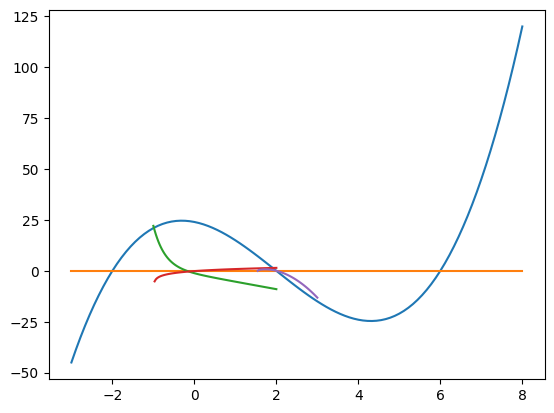

In [7]:
a = -3
b = 8
f = lambda x: x**3-6*x**2-4*x+24
g = lambda x: np.exp(-x)-(x+1)    # in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
h = lambda x: np.log2(x+3)-2      # in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
i = lambda x: np.sqrt(x)-(x**2)/4 # in [1, 3]   tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=2**(4/3))
x = np.linspace(a,b, 100)
x1 = np.linspace(-1,2, 100)
x2 = np.linspace(-1,2, 100)
x3 = np.linspace(1,3, 100)
plt.plot(x, f(x),x, np.zeros_like(x))
plt.plot(x1, g(x))
plt.plot(x2, h(x))
plt.plot(x3, i(x))
plt.show()

BISEZIONE
FALSI


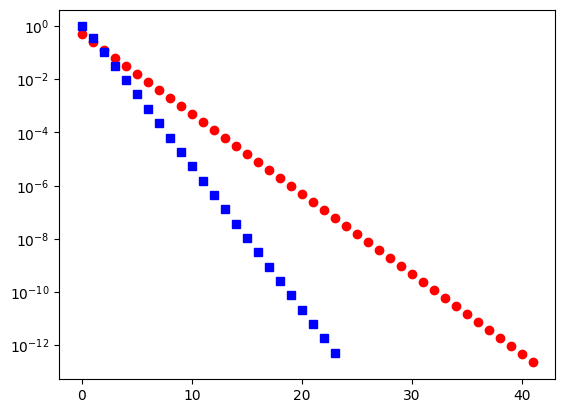

In [9]:
print("BISEZIONE")
a1=-3
b1 = 0
tolx=1.0e-12
xk, it, v_xk = bisection(f, a1, b1, tolx)

alpha = -2.0
ek= np.abs(np.array(v_xk)-alpha)
plt.semilogy(np.arange(it), ek,'ro')
a2 = 1.5
b2 = 2.5
xk, it, v_xk = bisection(f, a2, b2, tolx)

a3 = 4.5
b3 = 8.7
xk, it, v_xk = bisection(f, a3, b3, tolx)

print("FALSI")
tolf=1.0e-12
maxit=500
a1=-3
b1 = 0
tolx=1.0e-12
xk, itf, v_xkf = falses(f, a1, b1, tolx, tolf, maxit)

alpha = -2.0
ek= np.abs(np.array(v_xkf)-alpha)
plt.semilogy(np.arange(itf), ek,'bs')
a2 = 1.5
b2 = 2.5
xk, itf, v_xkf = falses(f, a2, b2, tolx, tolf, maxit)

a3 = 4.5
b3 = 8.7
xk, itf, v_xkf = falses(f, a3, b3, tolx, tolf, maxit)

## Esercizio 2

- Utilizzare il metodo di bisezione per calcolare la radice quadrata di 2. Analizzate i risultati.

In [11]:
print(math.sqrt(2))
fsqr = lambda x: x**2.0 - 2.0

xk, it, v_xk = bisection(fsqr, 0.0, 5 ,tolx)
print("zero: ", xk, "iterazioni: ", it, )
print(abs(math.sqrt(2)-xk))

1.4142135623730951
zero:  1.4142135623734475 iterazioni:  43
3.523847880160247e-13


## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [27]:
def normInf(A):
    return np.max(np.sum(np.abs(A),axis=1))

In [28]:
def normOne(A):
    return np.max(np.sum(np.abs(A),axis=0))

In [31]:
B=np.array([[2.0],[3],[4],[5]])
print("norm1: ", normOne(B),"real: ", np.linalg.norm(B,1))
print("normInf: ", normInf(B),"real: ", np.linalg.norm(B,np.inf))

norm1:  14.0 real:  14.0
normInf:  5.0 real:  5.0


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [35]:
A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])

def normTwo(A):
    return np.sqrt(np.max(np.abs(np.linalg.eigvals(A.T@A))))

print("norm2: ", normTwo(A),"real: ", np.linalg.norm(A,2))

norm2:  9.056251013341882 real:  9.056251013341878
